<a href="https://colab.research.google.com/github/rafaelsguerra/data_science_portfolio/blob/main/Regress%C3%A3o_linear_simples_do_zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementando Regressão Linear Simples do zero.
===

## O que é regressão linear?

Regressão Linear não é nada mais que uma equação utilizada para estimar o valor esperado de uma variável $y$ a partir de valores de outras variáveis $x$. Para a regressão linear simples, um modelo perfeito para realizar essas estimativas é a equação da reta $y = ax + b$, onde $a$ e $b$ são, respectivamente, os coeficientes angular e linear. 

De modo geral, pode-se dizer que um modelo é bom quando os valores previstos pela equação são exatamente iguais aos reais, mas este é um cenário que dificilmente (ou nunca) irá acontecer na vida real, portanto é preciso minimizar este erro. 

Uma das funções mais utilizadas para encontrar este erro é o RSS (Residual Sum of Squares) que é dado pela fórmula $\displaystyle RSS = \sum_{i = 1}^n (y_i - \hat{y_i})^2$, onde $y_i$ são os valores reais e $\hat{y}$ são os previstos. Como estamos falando de uma reta, é preciso achar valores valores para $a$ e $b$ de tal modo que o RSS seja o menor possível e que a reta de regressão se adeque bem aos dados.


## Gradient descent e equações normais

Um método para encontrar estes valores é o chamado **gradient descent**. Neste método, é aproveitado o fato de que a função RSS é quadrática, e que, portanto, comporta-se como uma parábola e possui um mínimo local. Logo, é possível utilizar-se de derivadas parciais para chegar a este ponto ou em algum outro aceitavelmente aproximado. Introduzindo os parâmetros $a$ e $b$ da equação da reta na função de RSS, obtemos $\displaystyle RSS(a, b) = \sum_{i=1}^n (y_i - [b + ax_i])^2$. A partir daí, pode-se obter as derivadas parciais:
* $\displaystyle \frac{\partial}{\partial b} RSS(a, b) = -2 \sum_{i=1}^n(y_i - [b + ax_i])$
* $\displaystyle \frac{\partial}{\partial a} RSS(a, b) = -2 \sum_{i=1}^n(y_i - [b + ax_i])x_i$

Com estas equações, obtém-se o gradiente determinado pelo vetor $ \nabla RSS = 
 \begin{pmatrix}
  \displaystyle -2 \sum_{i=1}^n(y_i - [b + ax_i]) \\
  \displaystyle -2 \sum_{i=1}^n(y_i - [b + ax_i])x_i
 \end{pmatrix}$
.

A partir de um chute inicial para os coeficientes $a$ e $b$, é iniciado um processo iterativo que irá determinar o vetor resultante contendo os valores que os coeficientes assumirão na reta de regressão. Para que a cada passo iterativo os coeficientes assumam valores que se aproximem do mínimo local, é necessário um valor $\alpha$ denonimado **learning rate** que determinará o quão profundo será o passo em direção a este ponto. Uma implementação deste método é apresentada neste artigo.

Outro método para obtenção dos coeficientes é utilizando fórmulas fechadas ou **equações normais**. Também aproveitando-se de que o RSS é uma função quadrática, é possível chegar no seu mínimo local a partir de sua derivada e igualando-a a zero. Com isso, utilizando as derivadas parciais obtidas acima e igualando-as a zero, obtém-se as fórmulas:
* $\displaystyle \hat{b} = \overline{y} - \hat{a}\overline{x}$
* $\displaystyle \hat{a} = \frac{\displaystyle \sum_{i=1}^n(x_i - \overline{x})(y_i - \overline{y})}{\displaystyle \sum_{i=1}^n(x_i - \overline{x})^2}$

Uma implementação deste método também é discutida neste artigo.

In [1]:
import numpy
import matplotlib.pyplot as plt
 
import time

## Implementação utilizando iteração máxima
Aqui será modificado o algoritmo visto [neste vídeo](https://www.youtube.com/watch?v=XdM6ER7zTLk) para imprimir o RSS a cada iteração do gradiente descendente e, ao final, gerar um gráfico mostrando a variação do RSS.

In [2]:
def compute_error_for_line_given_points(b, m, points):
  total_error = 0

  for i in range(0, len(points)):
    x = points[i, 0]
    y = points[i, 1]
    total_error += (y - (m * x + b)) ** 2
    
  return total_error / float(len(points))

In [3]:
def step_gradient(b_current, m_current, points, learning_rate):
  b_gradient = 0
  m_gradient = 0
  N = float(len(points))
 
  for i in range(0, len(points)):
    x = points[i, 0]
    y = points[i, 1]
    b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
    m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    
  new_b = b_current - (learning_rate * b_gradient)
  new_m = m_current - (learning_rate * m_gradient)
  return [new_b, new_m]

In [4]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
  b = starting_b
  m = starting_m
  errors = []
  
  for i in range(num_iterations):
    b, m = step_gradient(b, m, numpy.array(points), learning_rate)
    error = compute_error_for_line_given_points(b, m, points)

    if (i % 25 == 0):
      print("Iteration {}: RSS = {}".format(i, error))
    errors.append(error)

  plt.figure(figsize=(8,6))
  plt.plot(list(range(len(errors))), errors)
  plt.title("Variation of RSS - learning rate = " + str(learning_rate))
  plt.xlabel("Iteration")
  plt.ylabel("RSS")
  plt.grid()
  plt.show()
  
  return [b, m]

Starting gradient descent at b = 0, m = 0, error = 2946.6344970460195
Running...
Iteration 0: RSS = 2648.2381266261386
Iteration 25: RSS = 263.6216509895024
Iteration 50: RSS = 114.65917190116292
Iteration 75: RSS = 105.32246636625382
Iteration 100: RSS = 104.70597869157886
Iteration 125: RSS = 104.6341202385038
Iteration 150: RSS = 104.59629197125872
Iteration 175: RSS = 104.56060487919999
Iteration 200: RSS = 104.52506735534097
Iteration 225: RSS = 104.48955500812818
Iteration 250: RSS = 104.45406006127061
Iteration 275: RSS = 104.41858202158214
Iteration 300: RSS = 104.38312085074011
Iteration 325: RSS = 104.34767653883328
Iteration 350: RSS = 104.31224907772851
Iteration 375: RSS = 104.27683845940734
Iteration 400: RSS = 104.24144467586197
Iteration 425: RSS = 104.20606771908889
Iteration 450: RSS = 104.17070758108825
Iteration 475: RSS = 104.1353642538642
Iteration 500: RSS = 104.10003772942464
Iteration 525: RSS = 104.0647279997813
Iteration 550: RSS = 104.0294350569496
Iteration

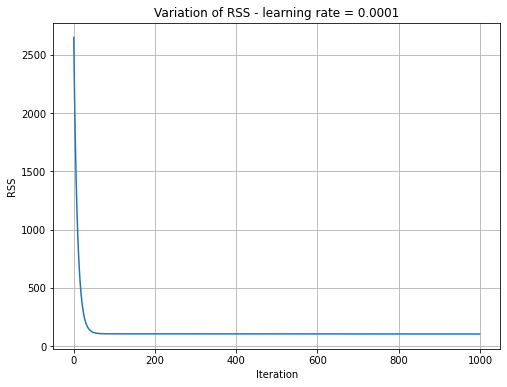

After 1000 iterations b = -0.18234255376510086, m = 3.262182267596014, error = 103.39842291729676
Processing time: 0.2920234203338623 seconds


In [5]:
points = numpy.genfromtxt("income.csv", delimiter=",")
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
print("Running...")
t0 = time.time()
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
t1 = time.time()
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
print("Processing time: {} seconds".format(t1-t0))

## Comparando learning rate
Aqui serão testados diferentes valores de learning rate com um breve comentário justificando as diferenças encontradas.

Iteration 0: RSS = 2648.2381266261386
Iteration 25: RSS = 263.6216509895024
Iteration 50: RSS = 114.65917190116292
Iteration 75: RSS = 105.32246636625382
Iteration 100: RSS = 104.70597869157886
Iteration 125: RSS = 104.6341202385038
Iteration 150: RSS = 104.59629197125872
Iteration 175: RSS = 104.56060487919999
Iteration 200: RSS = 104.52506735534097
Iteration 225: RSS = 104.48955500812818
Iteration 250: RSS = 104.45406006127061
Iteration 275: RSS = 104.41858202158214
Iteration 300: RSS = 104.38312085074011
Iteration 325: RSS = 104.34767653883328
Iteration 350: RSS = 104.31224907772851
Iteration 375: RSS = 104.27683845940734
Iteration 400: RSS = 104.24144467586197
Iteration 425: RSS = 104.20606771908889
Iteration 450: RSS = 104.17070758108825
Iteration 475: RSS = 104.1353642538642
Iteration 500: RSS = 104.10003772942464
Iteration 525: RSS = 104.0647279997813
Iteration 550: RSS = 104.0294350569496
Iteration 575: RSS = 103.99415889294873
Iteration 600: RSS = 103.95889949980202
Iteration 

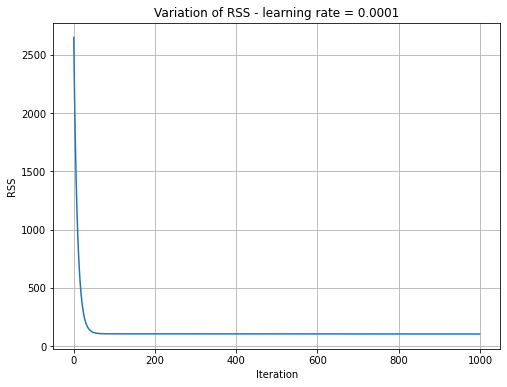

[-0.18234255376510086, 3.262182267596014]

In [6]:
learning_rate = 0.0001
gradient_descent_runner(points, 0, 0, learning_rate, 1000)


Iteration 0: RSS = 707.2710165896411
Iteration 25: RSS = 104.44127022879209
Iteration 50: RSS = 104.08729346059191
Iteration 75: RSS = 103.7349960307014
Iteration 100: RSS = 103.38436997199541
Iteration 125: RSS = 103.03540735514665
Iteration 150: RSS = 102.68810028844636
Iteration 175: RSS = 102.34244091762513
Iteration 200: RSS = 101.99842142567645
Iteration 225: RSS = 101.65603403267876
Iteration 250: RSS = 101.31527099562031
Iteration 275: RSS = 100.97612460822376
Iteration 300: RSS = 100.63858720077194
Iteration 325: RSS = 100.30265113993418
Iteration 350: RSS = 99.96830882859435
Iteration 375: RSS = 99.63555270567804
Iteration 400: RSS = 99.3043752459825
Iteration 425: RSS = 98.97476896000605
Iteration 450: RSS = 98.6467263937786
Iteration 475: RSS = 98.32024012869331
Iteration 500: RSS = 97.99530278133861
Iteration 525: RSS = 97.67190700333161
Iteration 550: RSS = 97.35004548115147
Iteration 575: RSS = 97.02971093597414
Iteration 600: RSS = 96.71089612350794
Iteration 625: RSS =

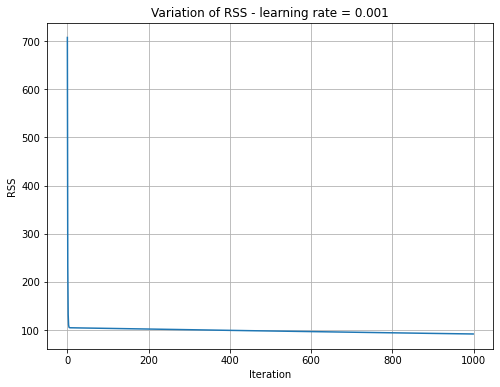

[-3.403476317589064, 3.4539297809959373]

In [7]:
learning_rate = 0.001
gradient_descent_runner(points, 0, 0, learning_rate, 1000)


Iteration 0: RSS = 1192.5455472930987
Iteration 25: RSS = 103.70678031543049
Iteration 50: RSS = 102.66018537480086
Iteration 75: RSS = 101.62841710012748
Iteration 100: RSS = 100.61126540872941
Iteration 125: RSS = 99.60852323424139
Iteration 150: RSS = 98.61998644371121
Iteration 175: RSS = 97.64545379604353
Iteration 200: RSS = 96.68472690103265
Iteration 225: RSS = 95.73761017897496
Iteration 250: RSS = 94.80391082085386
Iteration 275: RSS = 93.88343874908881
Iteration 300: RSS = 92.97600657884037
Iteration 325: RSS = 92.08142957986321
Iteration 350: RSS = 91.1995256389
Iteration 375: RSS = 90.33011522260747
Iteration 400: RSS = 89.473021341008
Iteration 425: RSS = 88.6280695114592
Iteration 450: RSS = 87.79508772313335
Iteration 475: RSS = 86.97390640200032
Iteration 500: RSS = 86.16435837630709
Iteration 525: RSS = 85.36627884254514
Iteration 550: RSS = 84.57950533190089
Iteration 575: RSS = 83.80387767718142
Iteration 600: RSS = 83.03923798020814
Iteration 625: RSS = 82.28543057

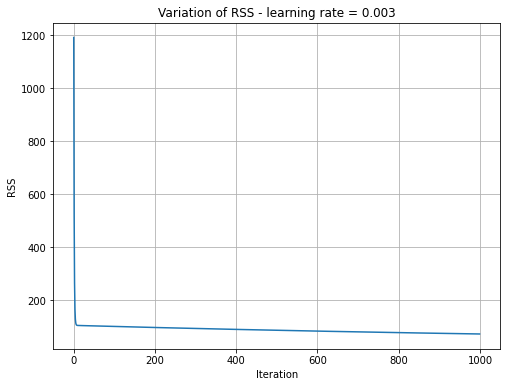

[-9.647708875888311, 3.8256361905811556]

In [8]:
learning_rate = 0.003
gradient_descent_runner(points, 0, 0, learning_rate, 1000)

É possível concluir que, ao aumentar a learning rate, o valor do RSS diminui. Isso acontece porque é dado um passo maior em direção ao valor mínimio possível do RSS a cada iteração do gradiente descendente. Apesar da aparente vantagem, o learning rate não deve possuir valores altos demais, pois um salto grande demais pode nunca atingir o valor mínimo do RSS, acarretando na não convergência do algorítmo.

## Teste exaustivo

Aqui foram testados vários valores de learning rate até que os parâmetros w0 e w1 assumissesm valores aproximadamente iguais a -39 e 5, respectivamente.

Após várias tentativas, foi obtido o seguinte resultado:

Iteration 0: RSS = 2926.0521028984167
Iteration 25: RSS = 2457.030923362109
Iteration 50: RSS = 2065.5702038707796
Iteration 75: RSS = 1738.8153514888772
Iteration 100: RSS = 1466.042749016033
Iteration 125: RSS = 1238.3064828068761
Iteration 150: RSS = 1048.143636043472
Iteration 175: RSS = 889.3284384786847
Iteration 200: RSS = 756.6671732236716
Iteration 225: RSS = 645.8270838761715
Iteration 250: RSS = 553.1936454124486
Iteration 275: RSS = 475.7514966978579
Iteration 300: RSS = 410.9851119925081
Iteration 325: RSS = 356.7959391213157
Iteration 350: RSS = 311.43327446460836
Iteration 375: RSS = 273.4365974791706
Iteration 400: RSS = 241.58746498873597
Iteration 425: RSS = 214.86938042538387
Iteration 450: RSS = 192.4343159345371
Iteration 475: RSS = 173.57478443192772
Iteration 500: RSS = 157.70054154161542
Iteration 525: RSS = 144.31914987349302
Iteration 550: RSS = 133.01976534179778
Iteration 575: RSS = 123.45961137483228
Iteration 600: RSS = 115.35269541743851
Iteration 625: RS

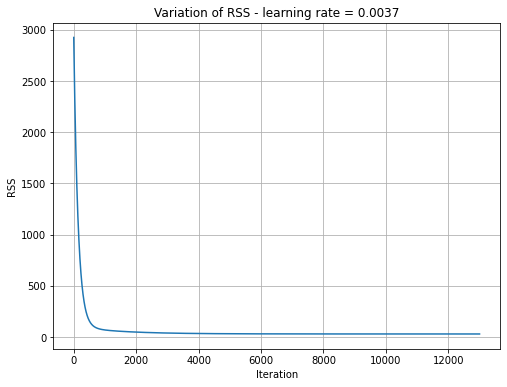

[-39.03787644918523, 5.575172833199998]

In [9]:
learning_rate = 0.0037
min_iterations = 13000

gradient_descent_runner(points, 0, 0, learning_rate, min_iterations)

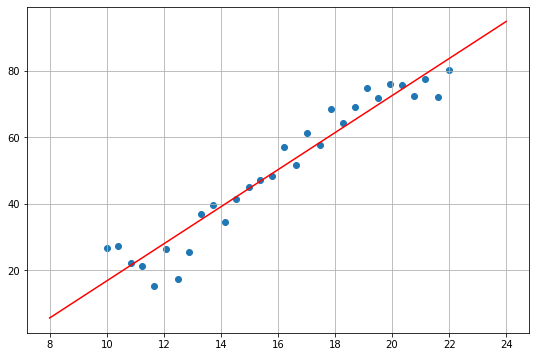

In [10]:
points
x = []
y = []

for elem in points:
  x.append(elem[0])
  y.append(elem[1])

x_reg = list(range(8, 25))
y_reg = [(-39.03787644918523 + (5.575172833199998 * elem)) for elem in x_reg]

plt.figure(figsize=(9,6))
plt.scatter(x, y)
plt.plot(x_reg, y_reg, color="r")
plt.grid()
plt.show()

Com aproximadamente **13 mil iterações** e assumindo um **learning rate de 0.0037**, foi possível obter valores similares a -39 e 5 para w0 e w1. Repare que a reta de regressão formada por esses coeficientes é bem adequada visualmente.

## Implementação utilizando critério de tolerância

Aqui foi modificado o algoritmo visto anteriormente de modo que a comparação entre a norma do vetor do gradiente e um critério de tolerância seja considerada em vez do número de iterações.

Alterar o algoritmo para que a comparação entre a norma do vetor do gradiente e um critério de tolerância seja considerada em vez do número de iterações. Depois, informe um valor de tolerância que se aproxime dos valores da atividade anterior.

In [11]:
def gradient_rss(points, b, m):
  b_gradient = 0
  m_gradient = 0
  N = float(len(points))

  for i in range(len(points)):
    x = points[i, 0]
    y = points[i, 1]

    b_gradient += (-2/N) * (y - (b + m * x))
    m_gradient += (-2/N) * ((y - (b + m * x)) * x)

  return [b_gradient, m_gradient]

In [12]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, tolerance):
  b = starting_b
  m = starting_m
  errors = []
  i = 0
  N = float(len(points))

  while numpy.linalg.norm(gradient_rss(points, b, m)) >= tolerance:
    
    temp_0 = b
    temp_1 = m

    for j in range(len(points)):
      x = points[j, 0]
      y = points[j, 1]
      temp_0 += (2/N) * learning_rate * (y - (b + m * x))
      temp_1 += (2/N) * learning_rate * (y - (b + m * x)) * x

    b = temp_0
    m = temp_1
    error = compute_error_for_line_given_points(b, m, points)
    
    if i%100 == 0: print("Iteration {}: RSS = {}".format(i, error))
    errors.append(error)

    i += 1
  

  plt.figure(figsize=(8,6))
  plt.plot(list(range(len(errors))), errors)
  plt.title("Variation of RSS - learning rate = " + str(learning_rate))
  plt.xlabel("Iteration")
  plt.ylabel("RSS")
  plt.grid()
  plt.show()

  return [b, m]

Iteration 0: RSS = 2926.052102898421
Iteration 100: RSS = 1466.0427490160482
Iteration 200: RSS = 756.6671732236714
Iteration 300: RSS = 410.9851119925052
Iteration 400: RSS = 241.58746498873435
Iteration 500: RSS = 157.70054154161508
Iteration 600: RSS = 115.35269541744013
Iteration 700: RSS = 93.23954328957248
Iteration 800: RSS = 81.0352359336333
Iteration 900: RSS = 73.73146487076902
Iteration 1000: RSS = 68.89575687249906
Iteration 1100: RSS = 65.34360769592442
Iteration 1200: RSS = 62.49535289411748
Iteration 1300: RSS = 60.064664970438095
Iteration 1400: RSS = 57.90766210296096
Iteration 1500: RSS = 55.94980434568422
Iteration 1600: RSS = 54.150464743130286
Iteration 1700: RSS = 52.48574837248945
Iteration 1800: RSS = 50.94015054232819
Iteration 1900: RSS = 49.502497293833486
Iteration 2000: RSS = 48.16396118358035
Iteration 2100: RSS = 46.91708337812022
Iteration 2200: RSS = 45.75528426506321
Iteration 2300: RSS = 44.6726117295995
Iteration 2400: RSS = 43.66360553419453
Iterati

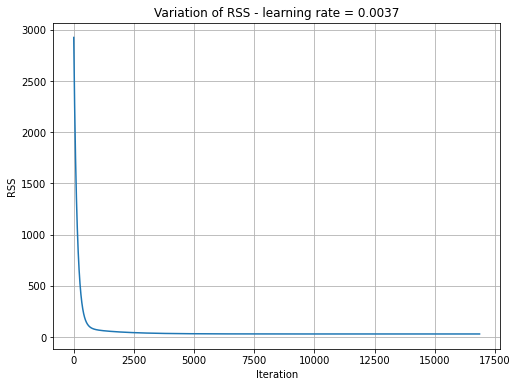

Processing time: 3.4746954441070557 seconds
Coefficients: [-39.341324641876454, 5.593236484280751]


In [13]:
t0 = time.time()
coefficients = gradient_descent_runner(points, 0, 0, 0.0037, 0.01)
t1 = time.time()
print('Processing time: {} seconds'.format(t1 - t0))
print('Coefficients: {}'.format(coefficients))

Utilizando um critério de tolerância de 0.01, foi possível obter valores similares em relação ao exercício anterior. É possível concluir que ambos os algoritmos tem eficiência equivalente, mas a versão que considera o critério de tolerância tem maior potêncial para encontrar valores que minimizem o rss, dado que foi possível encontrar um RSS um pouco menor que o da atividade anterior, ao custo de mais iterações.

## Implementação utilizando forma fechada
Aqui foi feita uma implementação utilizando as fórmula fechadas para calcular os coeficientes de regressão.

In [14]:
def simple_linear_regression(data): 
  temp_x = 0
  temp_y = 0

  for i in range(len(data)):
    temp_x += data[i, 0]
    temp_y += data[i, 1]

  mean_x = temp_x / len(data)
  mean_y = temp_y / len(data)

  a = 0
  b = 0

  for i in range(len(data)):
    a += (data[i, 0] - mean_x) * (data[i, 1] - mean_y)
    b += ((data[i, 0] - mean_x) ** 2)

  w_1 = a / b
  w_0 = mean_y - (w_1 * mean_x)

  return [w_0, w_1]

In [15]:
t0 = time.time()
coefficients = simple_linear_regression(points)
t1 = time.time()
print('Processing time: {} seconds'.format(t1-t0))
print('Coefficients: {}'.format(coefficients))

Processing time: 0.00021386146545410156 seconds
Coefficients: [-39.44625667909617, 5.599482874119919]


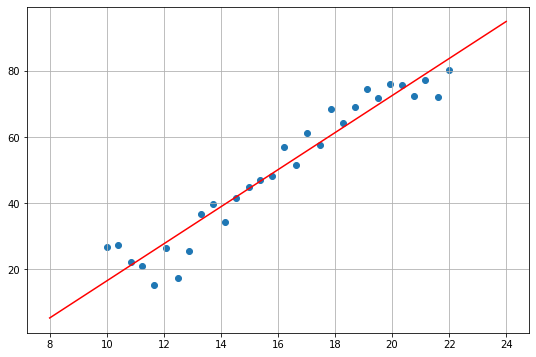

In [16]:
x = []
y = []

for elem in points:
  x.append(elem[0])
  y.append(elem[1])

x_reg = list(range(8, 25))
y_reg = [(-39.44625667909617 + (5.599482874119919 * elem)) for elem in x_reg]

plt.figure(figsize=(9,6))
plt.scatter(x, y)
plt.plot(x_reg, y_reg, color="r")
plt.grid()
plt.show()